<a href="https://colab.research.google.com/github/phancongdai/Mumbai_House_Prices/blob/main/ANN4Mumbai_House_Prices_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else: device = torch.device("cpu")
device

device(type='cpu')

In [ ]:
!pwd

/content


In [ ]:
# Tải dataset từ Kaggle
!kaggle datasets download -d dravidvaishnav/mumbai-house-prices

# Giải nén file dataset đã tải về
!unzip mumbai-house-prices.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/dravidvaishnav/mumbai-house-prices
License(s): apache-2.0
  0% 0.00/889k [00:00<?, ?B/s]
100% 889k/889k [00:00<00:00, 35.5MB/s]
Archive:  mumbai-house-prices.zip
  inflating: /content/Mumbai House Prices.csv  


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Mumbai House Prices.csv")

In [ ]:
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [ ]:
df.shape
df.index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [ ]:
# delete duplicated row
print(f"Number of row in raw data: {df.shape[0]}")
df = df.drop_duplicates()
print(f"After eliminating duplicated rows: {df.shape[0]}")
# delete null value
'''print(f"Elements in column Age in raw data {df.age.unique()}", end=", ")
null_df = df.loc[df.age == 'Unknown']
df = df.drop(null_df.index)
print(f"after deleting null data {df.age.unique()}")
print(f"Number of rows after deleting null value: {df.shape[0]}")'''

Number of row in raw data: 76038
After eliminating duplicated rows: 55726


'print(f"Elements in column Age in raw data {df.age.unique()}", end=", ")\nnull_df = df.loc[df.age == \'Unknown\']\ndf = df.drop(null_df.index)\nprint(f"after deleting null data {df.age.unique()}")\nprint(f"Number of rows after deleting null value: {df.shape[0]}")'

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1c5d195ec1c4fb2a698ae6e9310af3381c4a49d7204f82ce2f6a1ade18c9919d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Overview')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [ ]:
'''for i in df.index:
  if df.loc[i, 'price_unit'] == 'L':
      df.loc[i, 'price_unit'] = 'Cr'
      df.loc[i, 'price'] = df.loc[i, 'price'] * 100'''

"for i in df.index:\n  if df.loc[i, 'price_unit'] == 'L':\n      df.loc[i, 'price_unit'] = 'Cr'\n      df.loc[i, 'price'] = df.loc[i, 'price'] * 100"

In [ ]:
#df

In [ ]:
age_class = df['age'].unique()
df['age'].value_counts(normalize=True)

,proportion
age,
New,0.495011
Resale,0.351829
Unknown,0.153160


In [ ]:
df['bhk'].value_counts()

,count
bhk,
2,23609
1,19349
3,10109
4,2165
5,370
6,92
7,13
8,8
10,6


In [ ]:
greater_bhk = df[df['bhk']>=4]
print('Number of bhk is equal and greater than 4: {}'.format(greater_bhk.shape[0]))
df['bhk'].astype(str)
for i in greater_bhk.index:
  df.loc[i, 'bhk'] = '4+'
df['bhk'].unique()

Number of bhk is equal and greater than 4: 2659


<ipython-input-17-d4a05457a562>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4+' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'bhk'] = '4+'


array([3, 2, '4+', 1], dtype=object)

In [ ]:
df['bhk'].value_counts(normalize=True)

,proportion
bhk,
2,0.423662
1,0.347217
3,0.181405
4+,0.047716


In [ ]:
'''from sklearn.preprocessing import LabelEncoder
label = df['age'].unique()
label = ['Unknow', 'Resale', 'New']
le = LabelEncoder()
le.fit(label)
df['age'] = le.transform(df['age'])'''

"from sklearn.preprocessing import LabelEncoder\nlabel = df['age'].unique()\nlabel = ['Unknow', 'Resale', 'New']\nle = LabelEncoder()\nle.fit(label)\ndf['age'] = le.transform(df['age'])"

In [ ]:
df['type'].value_counts(normalize=True)

,proportion
type,
Apartment,0.983060
Studio Apartment,0.013064
Villa,0.002764
Independent House,0.001059
Penthouse,0.000054


In [ ]:
df['type'].value_counts(normalize=True)
# -> the 'type' feature is imbalance
#df0 = df.drop(['locality'], axis='columns')
#df0

,proportion
type,
Apartment,0.983060
Studio Apartment,0.013064
Villa,0.002764
Independent House,0.001059
Penthouse,0.000054


In [ ]:
df0 = df.drop(['locality', 'type'], axis='columns')
df0

,bhk,area,price,price_unit,region,status,age
0,3,685,2.50,Cr,Andheri West,Ready to move,New
1,2,640,52.51,L,Naigaon East,Under Construction,New
2,2,610,1.73,Cr,Borivali West,Under Construction,New
3,2,876,59.98,L,Panvel,Under Construction,New
4,2,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...
76033,3,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,4+,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4+,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [ ]:
df1 = pd.get_dummies(df0, columns=['age', 'status', 'region', 'price_unit', 'bhk'], dtype = float)

In [ ]:
df1

,area,price,age_New,age_Resale,age_Unknown,status_Ready to move,status_Under Construction,region_Adaigaon,region_Agripada,region_Airoli,...,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,price_unit_Cr,price_unit_L,bhk_1,bhk_2,bhk_3,bhk_4+
0,685,2.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,640,52.51,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,610,1.73,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,876,59.98,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,659,94.11,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,1527,7.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76034,3049,12.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
76035,3313,10.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
76036,1305,4.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
target = df1['price']
data = df1.drop(['price'], axis='columns')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#Define train and test set
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
#train_data, valid_data, train_target, valid_target = train_test_split(train_data, train_target, test_size=0.25, random_state=42, shuffle=True)
#Make a custom dataset
'''class CustomDataset(Dataset):
  def __init__(self, data, label):
    self.data = data
    self.label = label
  def __len__(self):
    return (self.data).size()[0]
  def __getitem__(self, index):
    return (self.data)[index], (self.label)[index]
dataset = CustomDataset(train_data, train_target)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)'''

'class CustomDataset(Dataset):\n  def __init__(self, data, label):\n    self.data = data\n    self.label = label\n  def __len__(self):\n    return (self.data).size()[0]\n  def __getitem__(self, index):\n    return (self.data)[index], (self.label)[index]\ndataset = CustomDataset(train_data, train_target)\ndataloader = DataLoader(dataset, batch_size=128, shuffle=True)'

In [ ]:
train_data

,area,age_New,age_Resale,age_Unknown,status_Ready to move,status_Under Construction,region_Adaigaon,region_Agripada,region_Airoli,region_Ambarnath,...,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,price_unit_Cr,price_unit_L,bhk_1,bhk_2,bhk_3,bhk_4+
63371,890,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
60523,1457,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
42872,610,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
36740,720,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
44497,599,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56844,1250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
73688,1040,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48229,620,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1395,658,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_data = scaler.fit_transform(train_data)
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.048069,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.083790,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.030429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.037359,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.029736,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44575,0.070749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
44576,0.057519,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
44577,0.031059,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
44578,0.033453,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
train_data, valid_data, train_target, valid_target = train_test_split(train_data, train_target, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
y_train_max = train_target.max()
y_train_min = train_target.min()
print('Max label in training data: {}\nMin label in training data: {}'.format(y_train_max, y_train_min))
#scale target by Min Max Normalization
def MinMax(min, max, y):
  return (y-min)/(max-min)
#train_target = MinMax(y_train_min, y_train_max, train_target)
#train_target

def Transform(min, max, y):
  return y*(max-min)+min

Max label in training data: 99.99
Min label in training data: 1.0


In [ ]:
train_target = MinMax(y_train_min, y_train_max, train_target)
valid_target = MinMax(y_train_min, y_train_max, valid_target)
test_target_scaled = MinMax(y_train_min, y_train_max, test_target)
test_data = scaler.transform(test_data)

In [ ]:
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.021168,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.039627,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.024318,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.064827,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.022680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33430,0.017829,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
33431,0.039249,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
33432,0.051597,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
33433,0.023499,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(valid_data)

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,0.024759,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.024129,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.049833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.058149,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.051660,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,0.108549,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11141,0.061299,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11142,0.026019,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11143,0.057204,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# #train_data = train_data.values
# #test_data = test_data.values
# #valid_data = valid_data.values
# train_target = train_target.values
# test_target = test_target.values
# valid_target = valid_target.values
# train_data = torch.tensor(train_data, dtype=torch.float)
# train_target = torch.tensor(train_target, dtype=torch.float).view(-1,1)
# test_data = torch.tensor(test_data, dtype=torch.float)
# test_target = torch.tensor(test_target, dtype=torch.float).view(-1,1)
# valid_data = torch.tensor(valid_data, dtype=torch.float)
# valid_target = torch.tensor(valid_target, dtype=torch.float).view(-1,1)

In [ ]:
# #Build early stopping to prevent overfitting
# class EarlyStopping:
#   def __init__(self, patience, delta):
#     self.patience = patience
#     self.delta = delta
#     self.counter = 0
#     self.best_score = None
#     self.early_stop = False
#     self.best_model = None
#   def __call__(self, val_loss, model):
#     if self.best_score is None:
#       self.best_score = val_loss
#     elif val_loss >= self.best_score + self.delta:
#       self.counter+=1
#       if self.counter>=self.patience:
#         self.early_stop = True
#     else:
#       self.best_score = val_loss
#       self.best_model = model.state_dict()
#       self.counter = 0
#   def load_best_model(self, updated_model):
#       updated_model.load_state_dict(self.best_model)

In [ ]:
# #Model
# class ANN_regressor(nn.Module):
#   def __init__(self, input_features):
#     super(ANN_regressor, self).__init__()
#     self.input_features = input_features
#     self.layer01 = nn.Linear(input_features, 256)
#     self.layer02 = nn.Linear(256, 128)
#     self.layer03 = nn.Linear(128, 64)
#     self.layer04 = nn.Linear(64, 32)
#     self.layer05 = nn.Linear(32, 16)
#     #self.layer06 = nn.Linear(16, 8)
#     #self.layer07 = nn.Linear(8, 4)
#     self.dropout = nn.Dropout(0.3)
#     self.final = nn.Linear(16, 1)
#   def forward(self, x):
#     x = F.relu(self.layer01(x))
#     x = F.relu(self.layer02(x))
#     x = F.relu(self.layer03(x))
#     x = F.relu(self.layer04(x))
#     x = F.relu(self.layer05(x))
#     #x = F.relu(self.layer06(x))
#     #x = F.relu(self.layer07(x))
#     x = self.dropout(x)
#     x = self.final(x)
#     return x

In [ ]:
# #torch.manual_seed(0)
# number_features = data.shape[1]
# model = ANN_regressor(input_features=number_features)
# '''for par in model.state_dict():
#   print(f"{par}:\t{model.state_dict()[par]}")'''
# print(f"Number of parameters: {len(list(model.parameters()))}")

In [ ]:
# #Define the loss function
# criterion = nn.L1Loss(reduction='mean')
# #criterion = nn.MSELoss()
# #Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr = 0.001)
# #optimizer = optim.SGD(model.parameters(), lr = 0.0001)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# epochs = 1000
# loss_train = []
# loss_valid = []
# early_stopping = EarlyStopping(patience = 5, delta = 0.0005)
# for epoch in range(epochs):
#   #Training model
#   model.train()
#   optimizer.zero_grad()
#   y_pred = model(train_data)
#   loss = criterion(y_pred, train_target)
#   loss_train.append(loss.item())
#   loss.backward()
#   optimizer.step()
#   print(f"[Epoch {epoch+1}/{epochs}] : Training Loss {loss} ;", end=" ")
#   #Evaluation model
#   model.eval()
#   with torch.no_grad():
#     valid_pred = model(valid_data)
#     valid_loss = criterion(valid_pred, valid_target)
#     print(f"Validation Loss {valid_loss}")
#     print(f"valid_r2_score : {r2_score(valid_target, valid_pred)}")
#     loss_valid.append(valid_loss.item())
#     early_stopping(model = model, val_loss = valid_loss)
#     if early_stopping.early_stop:
#       print(f"Early stopping at the epoch {epoch}")
#       early_stopping.load_best_model(updated_model = model)
#       break

In [ ]:
# x = list(range(1, len(loss_train)+1))
# plt.plot(x, loss_train, label='Training Loss')
# plt.plot(x, loss_valid, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='best')
# plt.show()

In [ ]:
# #test_target = test_target.numpy()
# with torch.inference_mode():
#   output = model(test_data)
#   finalloss = criterion(output, test_target)
#   score = r2_score(test_target, output)
#   print(f"[Test]: R2_score : {score}, Loss : {finalloss}")


In [ ]:
# #test_target = test_target.numpy()
# test_target = Transform(y_train_min, y_train_max, test_target)
# output = Transform(y_train_min, y_train_max, output)
# test_target = test_target.reshape(1,-1)
# output = output.reshape(1,-1)
# output_flat = output.flatten()
# test_target_flat = test_target.flatten()
# pd.DataFrame(data = {'Actual value':test_target_flat, 'Prediction':output_flat})


Iteration 1, loss = 0.00808816
Validation score: 0.936350
Iteration 2, loss = 0.00322963
Validation score: 0.943048
Iteration 3, loss = 0.00302317
Validation score: 0.944336
Iteration 4, loss = 0.00295613
Validation score: 0.944689
Iteration 5, loss = 0.00287870
Validation score: 0.943652
Iteration 6, loss = 0.00284398
Validation score: 0.940449
Iteration 7, loss = 0.00280090
Validation score: 0.943672
Iteration 8, loss = 0.00278801
Validation score: 0.944352
Iteration 9, loss = 0.00275556
Validation score: 0.944229
Iteration 10, loss = 0.00276187
Validation score: 0.944848
Iteration 11, loss = 0.00270768
Validation score: 0.943031
Iteration 12, loss = 0.00271505
Validation score: 0.943487
Iteration 13, loss = 0.00267857
Validation score: 0.943588
Iteration 14, loss = 0.00264909
Validation score: 0.943135
Iteration 15, loss = 0.00263750
Validation score: 0.943853
Iteration 16, loss = 0.00260629
Validation score: 0.943300
Validation score did not improve more than tol=0.000100 for 5 con

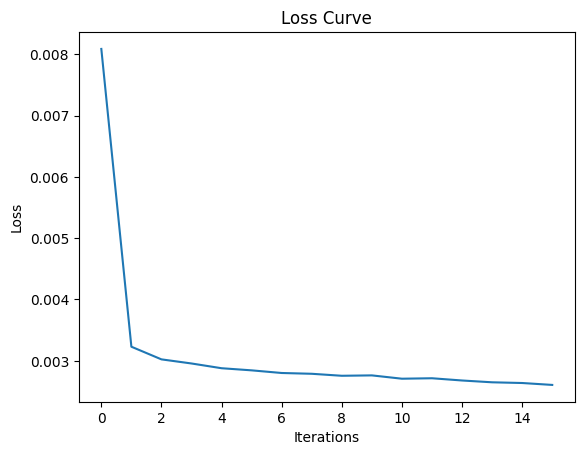

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), learning_rate_init=0.001, max_iter=1000, early_stopping=True, validation_fraction=0.25, verbose=True, n_iter_no_change=5)
mlp.fit(train_data, train_target)
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [ ]:
output = mlp.predict(test_data)
test_target_scaled = test_target_scaled.values
test_target_scaled = test_target_scaled.flatten()
print("r2_score:",r2_score(test_target_scaled, output))

r2_score: 0.9447217624589729


In [ ]:
output = Transform(y_train_min, y_train_max, output)
pd.DataFrame(data={'Actual value':test_target, 'Prediction':output})

,Actual value,Prediction
48462,90.00,91.632606
6405,1.20,1.502833
24982,1.26,1.314320
15026,95.00,83.082253
8851,80.00,67.100054
...,...,...
66952,2.25,3.300906
44886,61.50,61.621719
25344,39.00,39.325445
55699,4.25,4.689839
